<a href="https://colab.research.google.com/github/noreallyimfine/DS-Unit-2-Kaggle-Challenge/blob/master/module1/Copy_of_assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [x] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [x] Get your validation accuracy score.
- [x] Get and plot your feature importances.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.0)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
# Split train into train and val
train, val = train_test_split(train, train_size=0.8, test_size=0.2,
                              stratify=train['status_group'], random_state=42)

train.shape, val.shape

((47520, 41), (11880, 41))

In [4]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
7263,65358,500.0,2011-03-23,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2486,469,25.0,2011-03-07,Donor,290,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,VWC,NaN,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
313,1298,0.0,2011-07-31,Government Of Tanzania,0,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
52726,27001,0.0,2011-03-10,Water,0,Gove,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,VWC,Zeje,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


In [5]:
# Find NaN values
train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2904
gps_height                   0
installer                 2917
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 286
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2644
recorded_by                  0
scheme_management         3128
scheme_name              22532
permit                    2443
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [6]:
# Look for odd zeroes
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37037.915699,321.925261,669.567656,34.082431,-5.705946e+00,0.477736,15.258291,5.616751,179.805513,1302.768939
std,21412.099719,3197.240487,693.005745,6.552053,2.941332e+00,13.312977,17.530228,9.621230,463.081564,950.955437
min,0.000000,0.000000,-63.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18482.750000,0.000000,0.000000,33.092142,-8.528215e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,36986.500000,0.000000,372.500000,34.910740,-5.021436e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55450.250000,25.000000,1320.000000,37.170578,-3.327185e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.344301,-2.000000e-08,1776.000000,99.000000,80.000000,15300.000000,2013.000000


In [7]:
# Construction year needs to be dealt with 
train['construction_year'].value_counts()

0       16517
2010     2136
2008     2102
2009     2036
2000     1650
2007     1282
2006     1179
2003     1037
2011     1008
2004      909
2012      873
2002      860
1995      822
1978      817
2005      804
1998      793
1990      785
1999      776
1985      743
1996      642
1980      638
1984      621
1982      606
1972      581
1994      574
1974      562
1992      519
1997      514
1993      498
2001      427
1988      410
1983      374
1975      349
1986      337
1976      335
1970      329
1991      255
1987      239
1989      238
1981      187
1977      163
1979      152
1973      150
2013      137
1971      111
1960       82
1963       73
1967       71
1968       63
1969       48
1964       35
1962       22
1961       18
1965       16
1966       15
Name: construction_year, dtype: int64

In [8]:
# Look for a grouping to impute values to our year
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
status_group,47520,3,functional,25807
source_class,47520,3,groundwater,36638
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
management_group,47520,5,user-group,42027
quality_group,47520,6,good,40598
waterpoint_type_group,47520,6,communal standpipe,27642


In [9]:
# Region looks like a reasonable grouping
train.groupby('region')['construction_year'].value_counts()


# New column with decade of construction
train['construction_decade'] = (train['construction_year'] // 10) * 10
# Crosstab to see when water pumps were built
pd.crosstab(train['region'], train['construction_decade'], normalize='index')

construction_decade,0,1960,1970,1980,1990,2000,2010
region,,,,,,,
Arusha,0.014892,0.029784,0.072971,0.048399,0.188384,0.492182,0.153388
Dar es Salaam,0.015848,0.001585,0.077655,0.019017,0.023772,0.454834,0.407290
Dodoma,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Iringa,0.071294,0.001882,0.115294,0.139059,0.150824,0.445882,0.075765
Kagera,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kigoma,0.004394,0.002636,0.066344,0.167399,0.196397,0.464411,0.098418
Kilimanjaro,0.007118,0.031036,0.201025,0.037016,0.175683,0.402050,0.146071
Lindi,0.071137,0.005724,0.156173,0.260834,0.075225,0.228945,0.201962
Manyara,0.009346,0.003894,0.054517,0.031931,0.199377,0.473520,0.227414


In [10]:
sum(train['num_private'] != 0)

588

In [11]:
train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [12]:
train['payment'].unique()

array(['never pay', 'pay monthly', 'pay per bucket', 'unknown',
       'pay annually', 'pay when scheme fails', 'other'], dtype=object)

In [13]:
train['payment_type'].unique()

array(['never pay', 'monthly', 'per bucket', 'unknown', 'annually',
       'on failure', 'other'], dtype=object)

In [14]:
train['waterpoint_type'].unique()

array(['communal standpipe', 'hand pump', 'other',
       'communal standpipe multiple', 'improved spring', 'cattle trough',
       'dam'], dtype=object)

In [15]:
train['waterpoint_type_group'].unique()

array(['communal standpipe', 'hand pump', 'other', 'improved spring',
       'cattle trough', 'dam'], dtype=object)

In [16]:
train['extraction_type'].unique()

array(['gravity', 'india mark ii', 'other', 'mono', 'swn 80',
       'submersible', 'ksb', 'nira/tanira', 'other - swn 81', 'afridev',
       'india mark iii', 'other - play pump', 'other - rope pump',
       'climax', 'cemo', 'walimi', 'windmill',
       'other - mkulima/shinyanga'], dtype=object)

In [17]:
(train['gps_height'] == 0).sum()

16305

In [18]:
(train['construction_year'] == 0).sum()

16517

In [19]:
train[(train['gps_height'] == 0) & (train['construction_year'] == 0)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,construction_decade
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777e+00,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0
313,1298,0.0,2011-07-31,Government Of Tanzania,0,DWE,30.716727,-1.289055e+00,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional,0
52726,27001,0.0,2011-03-10,Water,0,Gove,35.389331,-6.399942e+00,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,VWC,Zeje,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional,0
54735,10307,0.0,2011-04-17,Water,0,DWE,36.292724,-5.177333e+00,Zahanati,0,Internal,Polisi,Dodoma,1,1,Kondoa,Mrijo,0,True,GeoData Consultants Ltd,VWC,Mrij,False,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional,0
25763,37145,0.0,2011-08-03,Danida,0,DANIDA,32.877248,-8.925921e+00,Mwambasi,0,Lake Rukwa,Bagamoyo,Mbeya,12,6,Mbozi,Halungu,0,False,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0
44540,49234,0.0,2011-08-03,Tancan,0,TANCAN,33.014412,-3.115869e+00,Mwanzuki,0,Lake Victoria,Mwanzuki,Mwanza,19,7,Missungwi,Shilalo,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,submersible,submersible,submersible,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,other,other,non functional,0
57420,4085,0.0,2011-07-15,Partage,0,DWE,31.746292,-1.253936e+00,Kihanga,0,Lake Victoria,Kihanga,Kagera,18,7,Misenyi,Bwanjai,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,non functional,0
54588,64881,0.0,2013-02-01,Rwssp,0,DWE,32.580108,-3.549380e+00,Buchambage,0,Lake Victoria,Buchambage,Shinyanga,17,3,Kahama,Chela,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,functional,0
5471,32356,0.0,2011-07-29,NaN,0,NaN,33.667940,-9.368970e+00,Kwa Mzee Mpoki,0,Lake Nyasa,Lugombo,Mbeya,12,4,Rungwe,Ilima,0,True,GeoData Consultants Ltd,VWC,M,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0
32604,3286,0.0,2013-02-04,Lwi,0,LWI,0.000000,-2.000000e-08,Upendo,0,Lake Victoria,Nyanding'O,Shinyanga,17,1,Bariadi,Mhango,0,False,GeoData Consultants Ltd,WUG,NaN,False,0,india mark ii,india mark ii,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,0


In [0]:
import numpy as np

def wrangle(X):

  # Prevent SettingWithCopyWarning
  X = X.copy()

  # Treat zeros as nulls, convert near zeros to zero
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  cols_with_zeros = ['longitude', 'latitude']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)

  # Convert date_recorded to datetime object
  X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True) 

  # replace 0 in construction year with mean construction year
  X['construction_year'] = X['construction_year'].replace(0, round(X['construction_year'].median()))

  # New column time_from_construction_to_inspection
  X['years_til_inspection'] = X['date_recorded'].dt.year - X['construction_year'] 

  # replace population 0s and 1s with the mean
  X['population'] = X['population'].replace([0,1], round(X['population'].mean()))

  # quantity group is a duplicate of quantity so drop
  X = X.drop(columns=['quantity_group', 'scheme_management', 
                      'recorded_by', 'payment', 'waterpoint_type'])

  return X

In [0]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [22]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq,first,last
public_meeting,44876,2,True,40838,NaN,NaN
permit,45077,2,True,31071,NaN,NaN
status_group,47520,3,functional,25807,NaN,NaN
source_class,47520,3,groundwater,36638,NaN,NaN
quantity,47520,5,enough,26567,NaN,NaN
management_group,47520,5,user-group,42027,NaN,NaN
quality_group,47520,6,good,40598,NaN,NaN
waterpoint_type_group,47520,6,communal standpipe,27642,NaN,NaN
source_type,47520,7,spring,13620,NaN,NaN
payment_type,47520,7,never pay,20287,NaN,NaN


In [23]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,construction_decade,years_til_inspection
count,47520.000000,47520.000000,47520.000000,46078.000000,46078.000000,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000,47520.00000,47520.000000
mean,37037.915699,321.925261,669.567656,35.149033,-5.884512,0.477736,15.258291,5.616751,265.645434,1993.062753,1299.95181,18.859154
std,21412.099719,3197.240487,693.005745,2.604241,2.805599,13.312977,17.530228,9.621230,437.811562,11.335912,948.90052,11.212157
min,0.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,2.000000,1960.000000,0.00000,-7.000000
25%,18482.750000,0.000000,0.000000,33.284679,-8.633876,0.000000,5.000000,2.000000,180.000000,1986.000000,0.00000,8.000000
50%,36986.500000,0.000000,372.500000,35.008578,-5.170151,0.000000,12.000000,3.000000,180.000000,1986.000000,1980.00000,25.000000
75%,55450.250000,25.000000,1320.000000,37.223501,-3.375068,0.000000,17.000000,5.000000,215.000000,2004.000000,2000.00000,26.000000
max,74247.000000,350000.000000,2770.000000,40.344301,-0.998464,1776.000000,99.000000,80.000000,15300.000000,2013.000000,2010.00000,53.000000


In [0]:
# Select features
categorical_features = ['region', 'quantity', 'quality_group',
                        'waterpoint_type_group', 'source_type',
                        'extraction_type_class', 'water_quality']
numerical_features = ['longitude', 'latitude', 'construction_year',
                      'years_til_inspection', 'gps_height', 'amount_tsh',
                      'district_code']

features = categorical_features + numerical_features
target = 'status_group'

# X matrix and y vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(max_depth=15, random_state=42)
)

In [35]:
pipeline.fit(X_train, y_train)

print('Training Accuracy: ', pipeline.score(X_train, y_train))
print('Validation Accuracy: ', pipeline.score(X_val, y_val))

Training Accuracy:  0.8044191919191919
Validation Accuracy:  0.7505050505050505


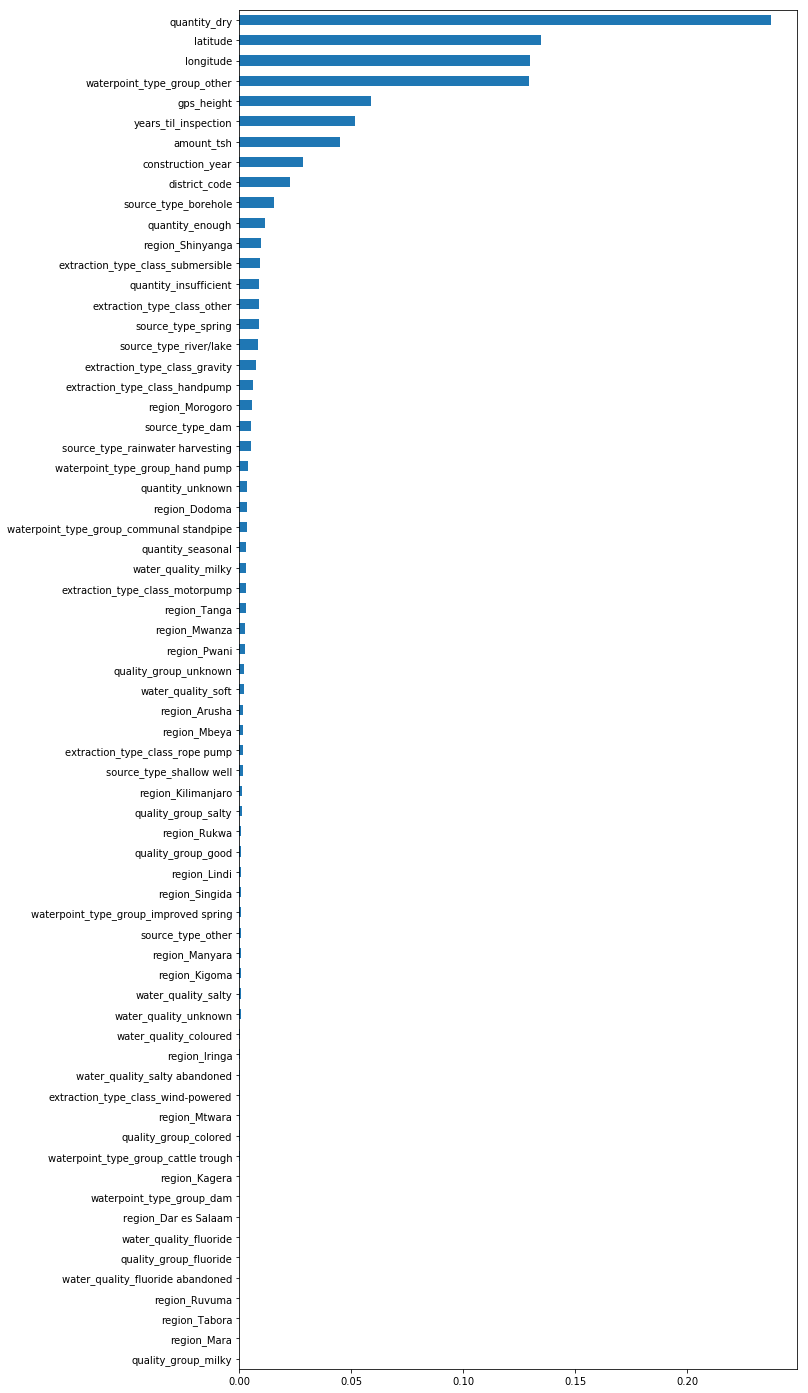

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.fit_transform(X_train).columns 
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,25))
importances.sort_values().plot.barh();

In [0]:
# Submission
y_pred = pipeline.predict(X_test)

submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-4.csv', index=False)

In [29]:
submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [0]:
submission.to_csv('submission4.csv', index=False)